# Отчёт по производительности для задания №4 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/4_log.txt").read_text(encoding="utf-8")

matrix_re = re.compile(r"Matrix: rows = (\d+), cols = (\d+), elements = (\d+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_matrix = None
lines = text.splitlines()

i = 0
while i < len(lines):
    line = lines[i].strip()

    m_matrix = matrix_re.search(line)
    if m_matrix:
        rows = int(m_matrix.group(1))
        cols = int(m_matrix.group(2))
        elements = int(m_matrix.group(3))
        current_matrix = (rows, cols, elements)
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads and current_matrix:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            time_line = lines[i].strip()
            m_time = time_re.search(time_line)
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'rows': current_matrix[0],
                    'cols': current_matrix[1],
                    'elements': current_matrix[2],
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df

Rows: 24


,rows,cols,elements,threads,time_ms,speedup,efficiency
0,1000,1000,1000000,1,5.932140,1.00000,1.000000
1,1000,1000,1000000,2,2.817970,2.10511,1.052550
2,1000,1000,1000000,4,1.419360,4.17944,1.044860
3,1000,1000,1000000,6,1.114290,5.32369,0.887281
4,1000,1000,1000000,8,0.895750,6.62254,0.827817
5,1000,1000,1000000,12,0.819389,7.23971,0.603309
6,5000,5000,25000000,1,137.418000,1.00000,1.000000
7,5000,5000,25000000,2,69.230900,1.98492,0.992460
8,5000,5000,25000000,4,34.389900,3.99587,0.998968
9,5000,5000,25000000,6,23.531800,5.83967,0.973279


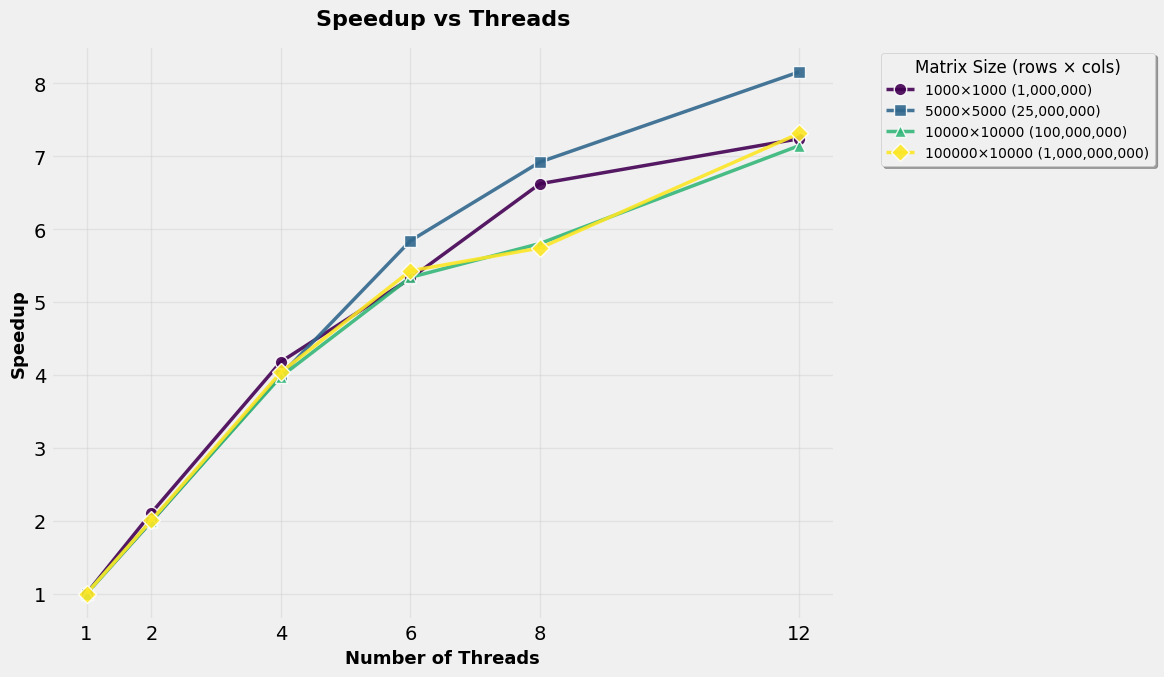

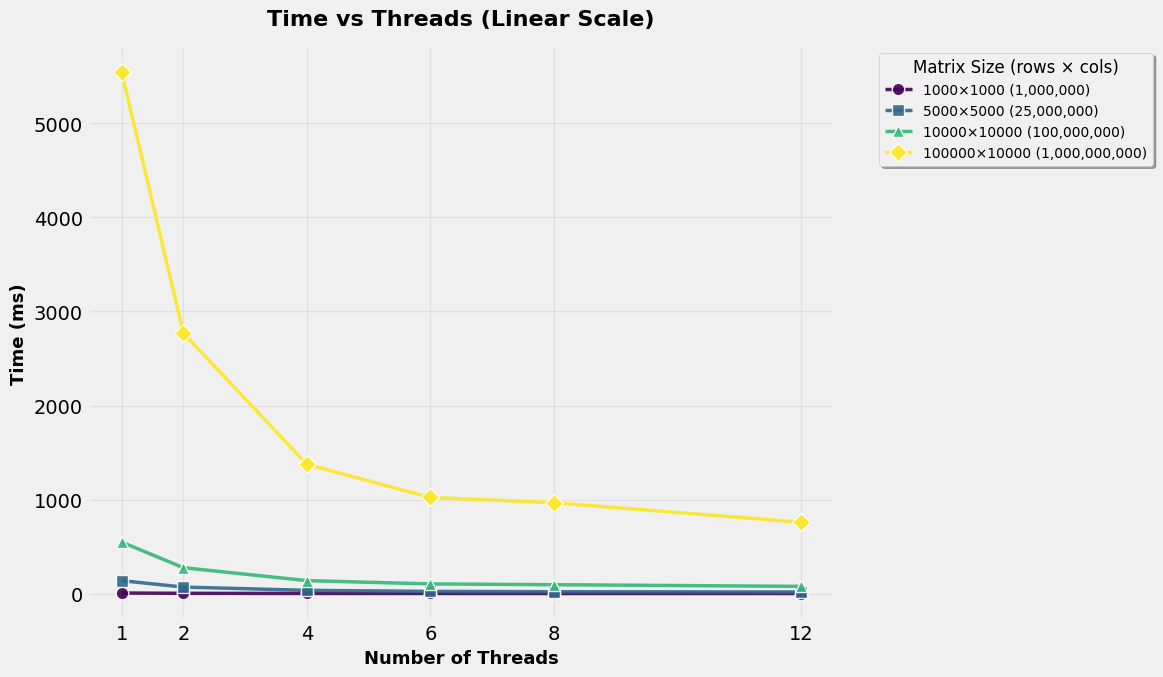

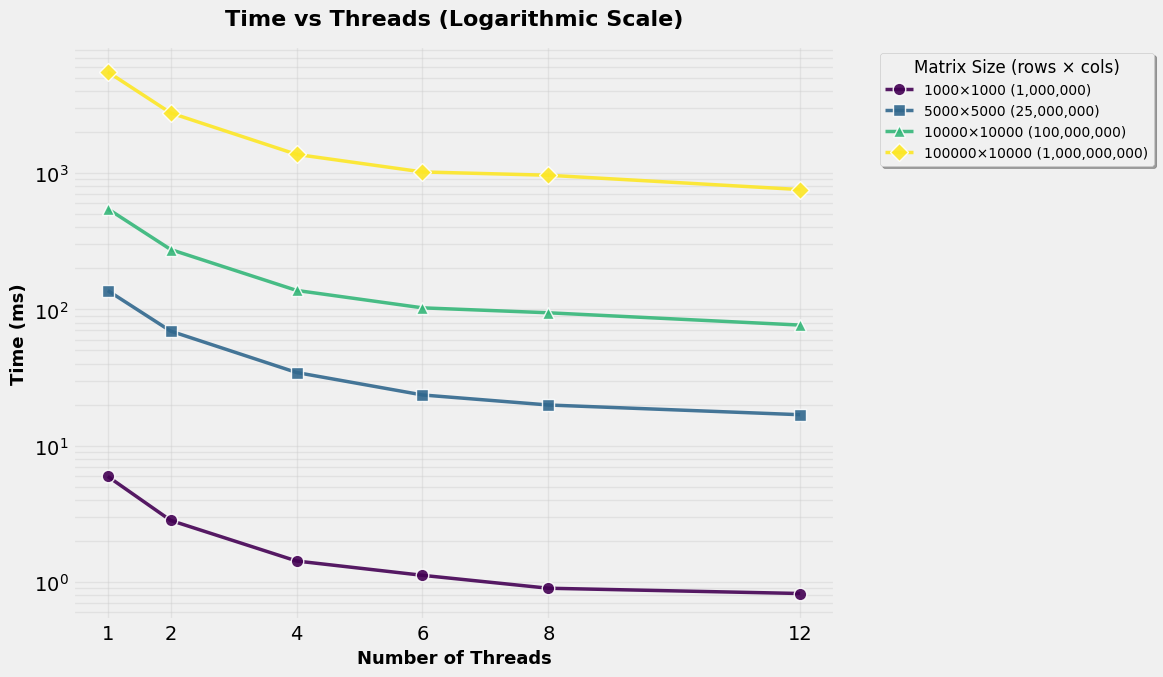

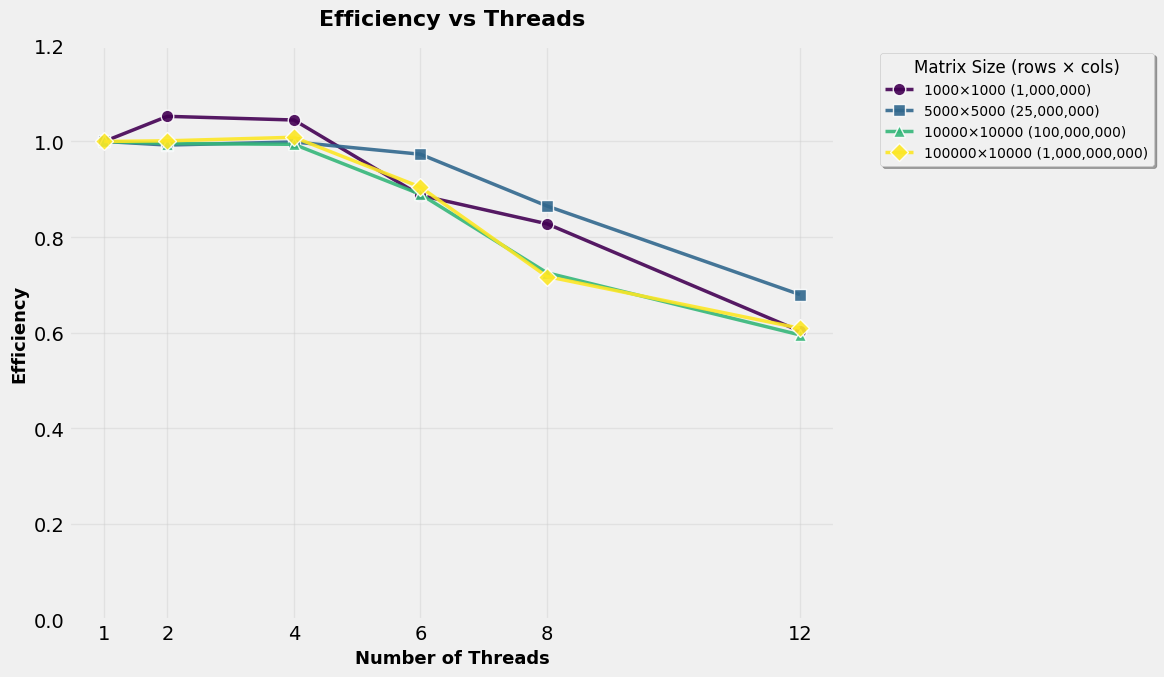

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

unique_elements = sorted(df['elements'].unique())
labels = [f"{r}×{c} ({e:,})" for r, c, e in df[['rows', 'cols', 'elements']].drop_duplicates().sort_values('elements').itertuples(index=False)]

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_elements)))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

threads = sorted(df['threads'].unique())

# 1. Speedup vs Threads 
plt.figure(figsize=(12, 7))
for idx, elem in enumerate(unique_elements):
    sub = df[df['elements'] == elem].sort_values('threads')
    label = labels[idx]
    plt.plot(sub['threads'], sub['speedup'], 
             marker=markers[idx % len(markers)], 
             linestyle='-', 
             color=colors[idx], 
             linewidth=2.5,
             markersize=9,
             markeredgewidth=1,
             markeredgecolor='white',
             alpha=0.9,
             label=label)

plt.title('Speedup vs Threads', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Threads', fontsize=13, fontweight='bold')
plt.ylabel('Speedup', fontsize=13, fontweight='bold')
plt.xticks(threads)
plt.grid(True, alpha=0.4, linestyle='-')
plt.legend(title='Matrix Size (rows × cols)', 
           title_fontsize=12, 
           fontsize=10,
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=True,
           fancybox=True,
           shadow=True)
plt.tight_layout()
plt.show()

#  2. Time vs Threads 
plt.figure(figsize=(12, 7))
for idx, elem in enumerate(unique_elements):
    sub = df[df['elements'] == elem].sort_values('threads')
    label = labels[idx]
    plt.plot(sub['threads'], sub['time_ms'], 
             marker=markers[idx % len(markers)], 
             linestyle='-', 
             color=colors[idx], 
             linewidth=2.5,
             markersize=9,
             markeredgewidth=1,
             markeredgecolor='white',
             alpha=0.9,
             label=label)

plt.title('Time vs Threads (Linear Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Threads', fontsize=13, fontweight='bold')
plt.ylabel('Time (ms)', fontsize=13, fontweight='bold')
plt.xticks(threads)
plt.grid(True, alpha=0.4, linestyle='-')
plt.legend(title='Matrix Size (rows × cols)', 
           title_fontsize=12, 
           fontsize=10,
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=True,
           fancybox=True,
           shadow=True)
plt.tight_layout()
plt.show()

# 3. Time vs Threads 
plt.figure(figsize=(12, 7))
for idx, elem in enumerate(unique_elements):
    sub = df[df['elements'] == elem].sort_values('threads')
    label = labels[idx]
    plt.plot(sub['threads'], sub['time_ms'], 
             marker=markers[idx % len(markers)], 
             linestyle='-', 
             color=colors[idx], 
             linewidth=2.5,
             markersize=9,
             markeredgewidth=1,
             markeredgecolor='white',
             alpha=0.9,
             label=label)

plt.title('Time vs Threads (Logarithmic Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Threads', fontsize=13, fontweight='bold')
plt.ylabel('Time (ms)', fontsize=13, fontweight='bold')
plt.yscale('log')
plt.xticks(threads)
plt.grid(True, alpha=0.4, linestyle='-', which='both')
plt.legend(title='Matrix Size (rows × cols)', 
           title_fontsize=12, 
           fontsize=10,
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=True,
           fancybox=True,
           shadow=True)
plt.tight_layout()
plt.show()

# 4. Efficiency vs Threads 
plt.figure(figsize=(12, 7))
for idx, elem in enumerate(unique_elements):
    sub = df[df['elements'] == elem].sort_values('threads')
    label = labels[idx]
    plt.plot(sub['threads'], sub['efficiency'], 
             marker=markers[idx % len(markers)], 
             linestyle='-', 
             color=colors[idx], 
             linewidth=2.5,
             markersize=9,
             markeredgewidth=1,
             markeredgecolor='white',
             alpha=0.9,
             label=label)

plt.title('Efficiency vs Threads', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Threads', fontsize=13, fontweight='bold')
plt.ylabel('Efficiency', fontsize=13, fontweight='bold')
plt.xticks(threads)
plt.ylim(bottom=0, top=1.2)
plt.grid(True, alpha=0.4, linestyle='-')
plt.legend(title='Matrix Size (rows × cols)', 
           title_fontsize=12, 
           fontsize=10,
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=True,
           fancybox=True,
           shadow=True)
plt.tight_layout()
plt.show()